In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree



In [2]:
# Reading csv files
stop = pd.read_csv("/Users/amad/Desktop/495/Audio/stop_data.csv")
go = pd.read_csv("/Users/amad/Desktop/495/Audio/go_data.csv")
up = pd.read_csv("/Users/amad/Desktop/495/Audio/up_data.csv")
down = pd.read_csv("/Users/amad/Desktop/495/Audio/down_data.csv")

In [3]:
# assigning labels
stop["label"] = "0"
stop.to_csv("stop_data.csv", index=False)
go["label"] = "1"
go.to_csv("go_data.csv", index=False)
up["label"] = "2"
up.to_csv("up_data.csv", index=False)
down["label"] = "3"
down.to_csv("down_data.csv", index=False)

In [4]:
# Merging all csv files and saving it into one csv file
frames = [stop, go, up, down]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

rndmged.to_csv('/Users/amad/Desktop/495/audio.csv', index=False)

In [5]:
# reading combined audio file with all four catagories
audio = pd.read_csv("/Users/amad/Desktop/495/audio.csv")

In [6]:
audio

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,sample,label
0,57.459999,58.919998,60.459999,66.939995,80.779999,83.419998,63.020000,52.320000,38.139999,19.139999,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,24,0
1,43.279999,31.340000,7.240000,3.620000,10.860000,12.000000,13.040000,14.480000,14.020000,12.000000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23,2
2,101.500000,134.399994,144.940002,141.179993,147.580002,125.339996,119.619995,98.019997,102.639999,95.979996,...,8.86,8.86,8.86,7.24,7.24,8.08,6.26,6.26,13,3
3,148.759995,258.320007,279.519989,299.899994,303.600006,314.359985,313.440002,312.000000,299.959991,278.820007,...,5.10,5.10,5.10,5.10,5.10,3.62,3.62,3.62,16,1
4,54.779999,63.619999,62.180000,62.279999,50.799999,73.220001,0.000000,5.100000,11.440000,16.180000,...,0.00,0.00,3.62,8.08,11.44,13.54,14.92,10.86,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44.180000,42.200001,48.559998,50.160000,44.619999,44.619999,35.099998,30.699999,28.719999,27.559999,...,3.62,3.62,0.00,0.00,0.00,0.00,0.00,0.00,3,1
96,43.279999,41.419998,40.619999,36.020000,36.739998,36.020000,33.360001,33.180000,35.279999,33.360001,...,5.10,5.10,6.26,5.10,5.10,5.10,3.62,3.62,18,3
97,43.119999,44.180000,45.500000,46.919998,49.360001,43.119999,43.739998,39.820000,30.059999,22.600000,...,6.26,6.26,6.26,6.26,6.26,7.24,8.08,8.08,18,0
98,69.339996,92.500000,84.820000,70.279999,68.299995,62.599998,54.059998,46.639999,28.260000,58.039997,...,0.00,0.00,5.10,8.08,13.04,11.44,8.08,6.26,1,0


In [7]:
# droping label and sample number and assigning it X
X = audio.drop(['sample', 'label'], axis=1)
# Assigning labels to y
y = audio['label']


In [8]:
# Splitting the data set into (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 64)
(80,)
(20, 64)
(20,)


In [9]:
# Fitting model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,max_depth = 2, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)


### Probability

In [10]:
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.45

### Recall, F1 score and Accuracy matrix

In [11]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.11      1.00      0.20         1
           2       1.00      0.71      0.83         7
           3       0.50      0.12      0.20         8

    accuracy                           0.45        20
   macro avg       0.53      0.58      0.43        20
weighted avg       0.66      0.45      0.48        20



### Confusion matrix

In [12]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[2 1 0 1]
 [0 1 0 0]
 [1 1 5 0]
 [1 6 0 1]]


### Random forest Regressor

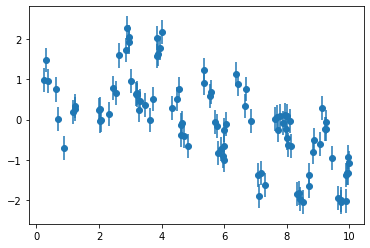

In [13]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


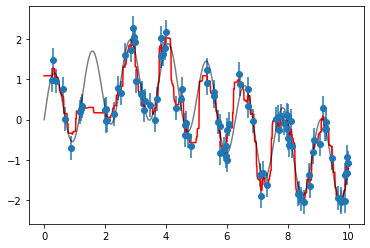

In [14]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [15]:
from micromlgen import port

with open("./models/Own_Audio_Classifier.h", "w") as file:
    file.write(port(clf, classname="Classifier"))

In [16]:
!cat ./models/Own_Audio_Classifier.h


#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class Classifier {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[4] = { 0 };
                        // tree #1
                        if (x[7] <= 19.6299991607666) {
                            if (x[31] <= 1.809999942779541) {
                                votes[0] += 1;
                            }

                            else {
                                votes[2] += 1;
                            }
                        }

                        else {
                            if (x[11] <= 10.53999948501587) {
                                votes[0] += 1;
                            }

                            else {
                                votes[1] += 1;
                            

In [17]:
!du -sh ./models/Own_Audio_Classifier.h


 68K	./models/Own_Audio_Classifier.h
